## Observations and Insights 

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

mouse_merge = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview

# Renaming columns so they can be addressed by code

mouse_merge.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice.
total_mice = len(mouse_merge["Mouse ID"].unique())
total_mice

249

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = mouse_merge[mouse_merge.duplicated(["Mouse ID", "Timepoint"])]
dup_mice = dup_mice["Mouse ID"].unique()
dup_mice_df = pd.DataFrame({"Mouse ID": dup_mice})
dup_mice_df

,Mouse ID
0,g989


In [8]:
# Optional: Get all the data for the duplicate mouse ID. 

mouse_merge.loc[mouse_merge["Mouse ID"].isin(dup_mice)]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mice_drop = mouse_merge[mouse_merge["Mouse ID"]==str("g989")].index
mice_clean = mouse_merge.drop(mice_drop)
mice_clean.reset_index(inplace=True)
mice_clean.head()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,0,k403,Ramicane,Male,21,16,0,45.000000,0
1,1,k403,Ramicane,Male,21,16,5,38.825898,0
2,2,k403,Ramicane,Male,21,16,10,35.014271,1
3,3,k403,Ramicane,Male,21,16,15,34.223992,1
4,4,k403,Ramicane,Male,21,16,20,32.997729,1


In [10]:
# Checking the number of mice in the clean DataFrame.
mice_clean_count = len(mice_clean["Mouse ID"].unique())

mice_clean_count 


248

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean_volume = mice_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
med_volume = mice_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var_volume = mice_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_volume = mice_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_volume = mice_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.

regimen_summary = pd.merge(mean_volume, med_volume, on="Drug Regimen")
regimen_summary.rename(columns={"Tumor Volume (mm3)_x":"Mean Tumor Vol","Tumor Volume (mm3)_y":"Median Tumor Vol"},inplace=True)
regimen_summary = pd.merge(regimen_summary, var_volume, on="Drug Regimen")
regimen_summary = pd.merge(regimen_summary, std_volume, on="Drug Regimen")
regimen_summary.rename(columns={"Tumor Volume (mm3)_x":"Tumor Vol Variance","Tumor Volume (mm3)_y":"Tumor Volume Std Dev"},inplace=True)
regimen_summary = pd.merge(regimen_summary, sem_volume, on="Drug Regimen")
regimen_summary.rename(columns={"Tumor Volume (mm3)":"Tumor Vol SEM"},inplace=True)

regimen_summary



,Mean Tumor Vol,Median Tumor Vol,Tumor Vol Variance,Tumor Volume Std Dev,Tumor Vol SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# Using the aggregation method, produce the same summary statistics in a single line

mice_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg({"mean","median","var","std","sem"})

,mean,std,median,sem,var
Drug Regimen,,,,,
Capomulin,40.675741,4.994774,41.557809,0.329346,24.947764
Ceftamin,52.591172,6.268188,51.776157,0.469821,39.290177
Infubinol,52.884795,6.567243,51.820584,0.492236,43.128684
Ketapril,55.235638,8.279709,53.698743,0.603860,68.553577
Naftisol,54.331565,8.134708,52.509285,0.596466,66.173479
Placebo,54.033581,7.821003,52.288934,0.581331,61.168083
Propriva,52.320930,6.622085,50.446266,0.544332,43.852013
Ramicane,40.216745,4.846308,40.673236,0.320955,23.486704
Stelasyn,54.233149,7.710419,52.431737,0.573111,59.450562


## Bar and Pie Charts

Text(0.5, 1.0, 'Treatment timepoints by Regimen')

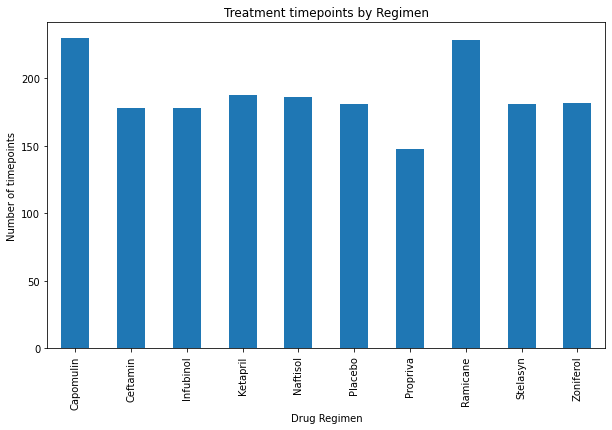

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

count_timepoints_per_mouse = mice_clean.groupby(["Drug Regimen"]).count()["Timepoint"]
count_timepoints_per_mouse.plot.bar(figsize=(10,6))
plt.ylabel("Number of timepoints")
plt.title("Treatment timepoints by Regimen")


Text(0, 0.5, 'Number of timepoints')

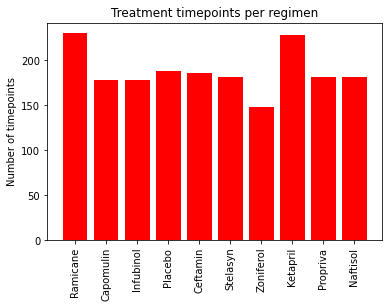

In [14]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = np.arange(1,11)
tick_locations = [value for value in x_axis]
tick_names = mice_clean["Drug Regimen"].unique()
plt.bar(x_axis, count_timepoints_per_mouse, color='r', align='center')
plt.xticks(tick_locations, tick_names, rotation='vertical')
plt.title("Treatment timepoints per regimen")
plt.ylabel("Number of timepoints")

Text(0.5, 1.0, 'Distribution of gender')

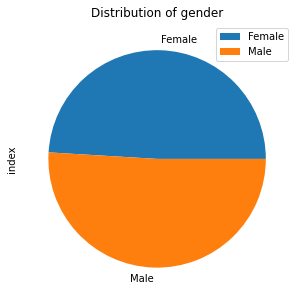

In [46]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

mouse_gender = pd.DataFrame(mice_clean.groupby(["Sex"]).count()["index"])
mouse_gender.plot.pie(figsize=(5,5),subplots=True)
plt.title("Distribution of gender")

Text(0.5, 1.0, 'Distribution of gender')

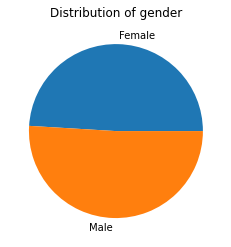

In [43]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Female","Male"]
sizes = [922, 958]
plt.pie(sizes, labels=labels)
plt.title("Distribution of gender")

## Quartiles, Outliers and Boxplots

In [104]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

max_timepoint = pd.DataFrame(mice_filtered.groupby(["Mouse ID"]).max()["Timepoint"])


# Put treatments into a list for for loop (and later for plot labels)

treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Filter data set
boolean_series = mice_clean["Drug Regimen"].isin(treatment_list)
mice_filtered = mice_clean[boolean_series]


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

max_timepoint_merge = pd.merge(max_timepoint, mice_filtered, how = "inner", on = ["Mouse ID", "Timepoint"])

max_timepoint_merge 

,Mouse ID,Timepoint,index,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,463,Infubinol,Female,20,23,67.973419,2
1,a251,45,473,Infubinol,Female,21,25,65.525743,1
2,a275,45,493,Ceftamin,Female,20,28,62.999356,3
3,a411,45,327,Ramicane,Male,3,22,38.407618,1
4,a444,45,430,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...,...
95,y769,45,1845,Ceftamin,Female,6,27,68.594745,4
96,y793,45,124,Capomulin,Male,17,17,31.896238,2
97,y865,45,1855,Ceftamin,Male,23,26,64.729837,3
98,z578,45,84,Ramicane,Male,11,16,30.638696,0


In [127]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatment_list:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    find_treatment = max_timepoint_merge.loc[max_timepoint_merge["Drug Regimen"]==treatment,:]
    quartiles = find_treatment["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"The lower quartile of {treatment} is: {lowerq}")
    print(f"The upper quartile of {treatment} is: {upperq}")
    print(f"The interquartile range of {treatment} is: {iqr}")
    print(f"The the median of {treatment} is: {quartiles[0.5]}\n")

    # add subset 
    subset = find_treatment.loc[:,"Tumor Volume (mm3)"]
    tumor_vol.append(subset)
    
    # Determine outliers using upper and lower bounds

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.\n")
    print("****************************************************\n")

        

The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 38.1251644

Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.

****************************************************

The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The the median of Ramicane is: 36.56165229

Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.

****************************************************

The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The the median of Infubinol is: 60.16518046

Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.

*****

/var/folders/mz/2rxvtwjx30zc8fr83rlnl3zh0000gn/T/ipykernel_1055/2887420943.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(treatment_list)


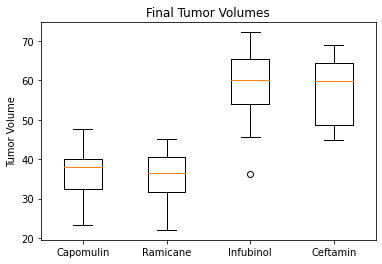

In [132]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volumes')
ax1.set_ylabel('Tumor Volume')
ax1.set_xticklabels(treatment_list)
ax1.boxplot(tumor_vol)
plt.show()

## Line and Scatter Plots

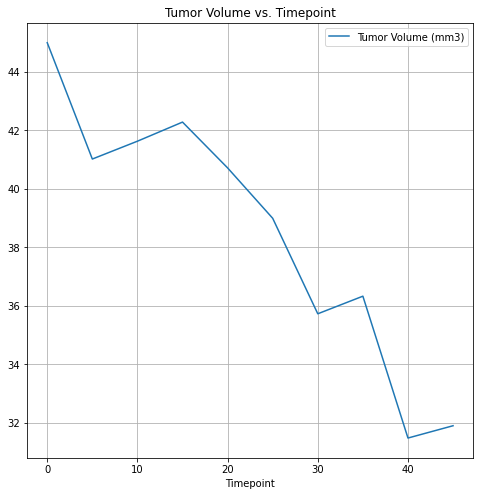

In [139]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_mouse = mice_clean["Mouse ID"].isin(["y793"])
capomulin_mouse_df = mice_clean[capomulin_mouse]
capomulin_mouse_df

capomulin_mouse_df.plot(kind="line", x="Timepoint", y="Tumor Volume (mm3)", grid=True, figsize=(8,8),
              title="Tumor Volume vs. Timepoint")
plt.show()




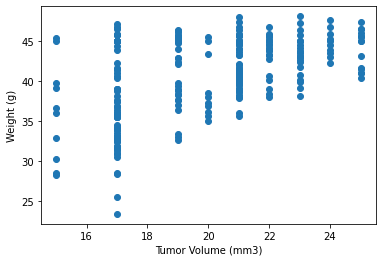

In [143]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_results = mice_clean["Drug Regimen"].isin(["Capomulin"])
capomulin_mouse_df = mice_clean[capomulin_results]

x_values = capomulin_mouse_df['Weight (g)']
y_values = capomulin_mouse_df['Tumor Volume (mm3)']
plt.scatter(x_values,y_values)
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Weight (g)')
plt.show()


## Correlation and Regression

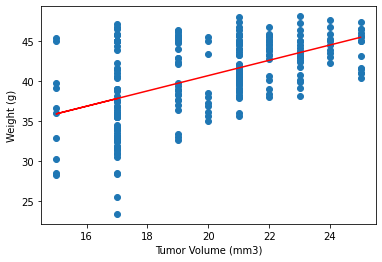

In [145]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Weight (g)')
plt.show()

